#Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Uploading Datasets

In [ ]:
data=pd.read_csv("compresive_strength_concrete.csv")

In [ ]:
data.shape

(1030, 9)

In [ ]:
data.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


#Selecting features and target feature

In [ ]:
X = data.iloc[:,0:8]

In [ ]:
X

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day)
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360
...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28


In [ ]:
Y=data[data.columns[8]]

In [ ]:
Y=pd.DataFrame(Y)

In [ ]:
Y

,"Concrete compressive strength(MPa, megapascals)"
0,79.99
1,61.89
2,40.27
3,41.05
4,44.30
...,...
1025,44.28
1026,31.18
1027,23.70
1028,32.77


# Standard Scaler

*** Standard scaler is used for standardization. It is represented as z.***

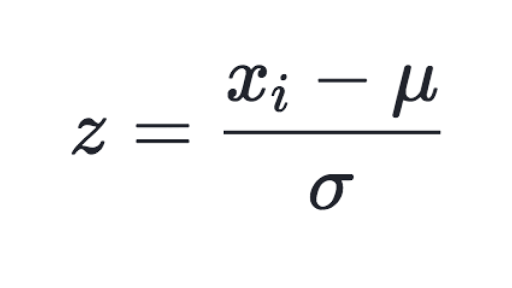

In [ ]:
from sklearn.preprocessing import StandardScaler # 

In [ ]:
scaler_x = StandardScaler()

In [ ]:
scaler_x.fit(X)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [ ]:
X= scaler_x.transform(X)

In [ ]:
X=pd.DataFrame(X)

In [ ]:
X

,0,1,2,3,4,5,6,7
0,2.477915,-0.856888,-0.847144,-0.916764,-0.620448,0.863154,-1.217670,-0.279733
1,2.477915,-0.856888,-0.847144,-0.916764,-0.620448,1.056164,-1.217670,-0.279733
2,0.491425,0.795526,-0.847144,2.175461,-1.039143,-0.526517,-2.240917,3.553066
3,0.491425,0.795526,-0.847144,2.175461,-1.039143,-0.526517,-2.240917,5.057677
4,-0.790459,0.678408,-0.847144,0.488793,-1.039143,0.070527,0.647884,4.978487
...,...,...,...,...,...,...,...,...
1025,-0.045645,0.488235,0.564545,-0.092171,0.451410,-1.323005,-0.065893,-0.279733
1026,0.392819,-0.856888,0.960068,0.676200,0.702626,-1.994680,0.496893,-0.279733
1027,-1.270088,0.759579,0.850635,0.521589,-0.017528,-1.036064,0.080107,-0.279733
1028,-1.168610,1.308065,-0.847144,-0.279579,0.853356,0.214641,0.191166,-0.279733


In [ ]:
scaler_y=StandardScaler()

In [ ]:
scaler_y.fit(Y)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [ ]:
Y=scaler_y.transform(Y)

In [ ]:
Y=pd.DataFrame(Y)

In [ ]:
Y

,0
0,2.645408
1,1.561421
2,0.266627
3,0.313340
4,0.507979
...,...
1025,0.506781
1026,-0.277762
1027,-0.725729
1028,-0.182539


#Training and testing data splittion

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,train_size=0.5,shuffle=True)

#Model selection

In [ ]:
from tensorflow.keras import layers as L
from tensorflow.keras import models as M

In [ ]:
network = M.Sequential()

In [ ]:
network.add(L.Dense(10,activation="relu",input_shape=(X_train.shape[1],)))

In [ ]:
network.add(L.Dense(8,activation="relu"))

In [ ]:
network.add(L.Dense(6,activation="relu"))

In [ ]:
network.add(L.Dense(1))

In [ ]:
network.compile(optimizer="rmsprop",loss=["mse"],metrics=["mae"])

In [ ]:
network.fit(X_train,Y_train,epochs=100,validation_split=0.2)

Epoch 1/100
13/13 [==============================] - 1s 39ms/step - loss: 1.1613 - mae: 0.8950 - val_loss: 0.9223 - val_mae: 0.7903
Epoch 2/100
13/13 [==============================] - 0s 5ms/step - loss: 1.0773 - mae: 0.8586 - val_loss: 0.8943 - val_mae: 0.7770
Epoch 3/100
13/13 [==============================] - 0s 5ms/step - loss: 1.0496 - mae: 0.8459 - val_loss: 0.8639 - val_mae: 0.7622
Epoch 4/100
13/13 [==============================] - 0s 5ms/step - loss: 0.9603 - mae: 0.7967 - val_loss: 0.8249 - val_mae: 0.7433
Epoch 5/100
13/13 [==============================] - 0s 5ms/step - loss: 1.0732 - mae: 0.8455 - val_loss: 0.7823 - val_mae: 0.7220
Epoch 6/100
13/13 [==============================] - 0s 5ms/step - loss: 1.0091 - mae: 0.8350 - val_loss: 0.7367 - val_mae: 0.6978
Epoch 7/100
13/13 [==============================] - 0s 5ms/step - loss: 0.8750 - mae: 0.7582 - val_loss: 0.6904 - val_mae: 0.6708
Epoch 8/100
13/13 [==============================] - 0s 5ms/step - loss: 0.8828 - 

In [ ]:
loss,mae=network.evaluate(X_test,Y_test)

17/17 [==============================] - 0s 1ms/step - loss: 0.2021 - mae: 0.3220


In [ ]:
loss

0.20206531882286072